In [4]:
import sys
import pandas as pd
import matplotlib
import seaborn
import sklearn
print(sys.version)
print(pd.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)
#importing the libraries and printing the versions

3.8.10 (default, Jun  2 2021, 10:49:15) 
[GCC 9.4.0]
1.3.0
3.4.2
0.11.1
0.24.2


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
#our dataset is in the games.csv file in 'boardgamegeek' folder which contains over 80000 board game reviews to analyse
#loading the data
df=pd.read_csv('boardgamegeek/games.csv')
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [8]:
print(df.columns)
print(df.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


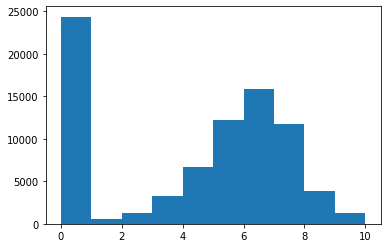

In [9]:
#We are going to train the model to predict the average rating of the game
#make a histogram of all average ratings in the average ratings column
plt.hist(df['average_rating'])
plt.show()

In [13]:
#as we see there are a lot of zero ratings in this dataset, which looks odd, let us check them
#checking first 5 rows
df[df['average_rating']==0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0


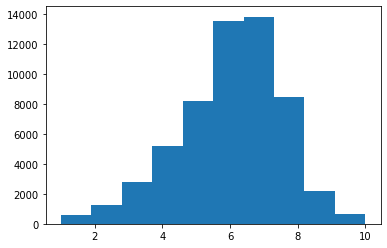

In [14]:
#lot of rows are present which have 0 values which are of no use to us
#remove rows with 0 values and remove rows with rating of 0
df=df[df['average_rating']>0]
df=df.dropna(axis=0)
#now creating histogram of cleaned data
plt.hist(df['average_rating'])
plt.show()